In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs
#The output is a zip object in memory

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-18.07219138553667 46.43760736325095
87.04586871375292 -154.89214285641756
26.788677018113162 -145.45572703593137
55.5664584195259 108.78963941193649
-33.38253302999321 74.03152813262159
34.09913804415811 69.97657208545735
-87.33166791094781 -70.75708274251076
-40.748764250331405 -53.31143636686721
45.19366561788809 -121.55176662627349
28.32751410316014 -6.903454829258038
85.93603103253426 57.40360232903606
58.39897622710939 -143.40572939174933
89.72269688170803 -80.45262066754188
-33.01488667480253 159.65495555503304
23.76619567366953 14.905076529148573
-62.09651530331437 159.12582979543498
84.03703817852036 15.438416414798866
-56.63925068294563 -59.92758086682895
-0.03051630801209626 -73.71366492451715
86.13773866829914 -25.50072169902461
10.860621623649592 135.92915941413918
-65.68370428630284 119.1644128233554
67.39665947815772 -146.88078054837243
-24.744229254576396 -158.92029048859428
-33.45468814945712 -14.624275776308423
65.59314672299348 18.057867235376932
-17.610831380138436 

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.

#Retrieve the nearest city using latitude and logitude pair 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

# If the city is unique, then we will add it to the cities list.

# We use the decision statement 'not in' to determine whether the found city is already in the 'cities' list

# If it is not in the list we use 'append()' to add it 

# We do this to aviod duplicates and only obtain unique cities out of the 1500 latitude and longitude pairs 
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

import requests

In [8]:
# Import the API key.
from Config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d82747281d32b60b6fcee2f9df4f6876


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fenoarivo
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | severobaykalsk
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | azrow
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | washougal
Processing Record 10 of Set 1 | tarudant
City not found. Skipping...
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | haines junction
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | port macquarie
Processing Record 15 of Set 1 | marzuq
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | puerto leguizamo
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Recor

Processing Record 35 of Set 4 | zhigansk
Processing Record 36 of Set 4 | ino
Processing Record 37 of Set 4 | trelew
Processing Record 38 of Set 4 | maragogi
Processing Record 39 of Set 4 | upata
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 4 | wasilla
Processing Record 42 of Set 4 | goundam
Processing Record 43 of Set 4 | ilebo
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | kahului
Processing Record 47 of Set 4 | popondetta
Processing Record 48 of Set 4 | lata
Processing Record 49 of Set 4 | aswan
Processing Record 50 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 1 of Set 5 | minsk
Processing Record 2 of Set 5 | omboue
Processing Record 3 of Set 5 | kalmunai
Processing Record 4 of Set 5 | iquitos
Processing Record 5 of Set 5 | lompoc
Processing Record 6 of Set 5 | havoysund
Processing Record 7 of Set 5 | am timan
Processing Record 8 of Set 

Processing Record 28 of Set 8 | thompson
Processing Record 29 of Set 8 | nouakchott
Processing Record 30 of Set 8 | darnah
Processing Record 31 of Set 8 | sitka
Processing Record 32 of Set 8 | langsa
Processing Record 33 of Set 8 | kaitangata
Processing Record 34 of Set 8 | mahajanga
Processing Record 35 of Set 8 | borogontsy
Processing Record 36 of Set 8 | kalaleh
Processing Record 37 of Set 8 | pimentel
Processing Record 38 of Set 8 | flinders
Processing Record 39 of Set 8 | torbay
Processing Record 40 of Set 8 | aranos
Processing Record 41 of Set 8 | banjar
Processing Record 42 of Set 8 | oktyabrskiy
Processing Record 43 of Set 8 | miragoane
Processing Record 44 of Set 8 | qaqortoq
Processing Record 45 of Set 8 | nhulunbuy
Processing Record 46 of Set 8 | khadyzhensk
Processing Record 47 of Set 8 | visby
Processing Record 48 of Set 8 | pasni
Processing Record 49 of Set 8 | namibe
Processing Record 50 of Set 8 | cap malheureux
Processing Record 1 of Set 9 | linqiong
Processing Record 

Processing Record 18 of Set 12 | loandjili
Processing Record 19 of Set 12 | elko
Processing Record 20 of Set 12 | havelock
Processing Record 21 of Set 12 | shimanovsk
Processing Record 22 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 23 of Set 12 | mizpe ramon
City not found. Skipping...
Processing Record 24 of Set 12 | olafsvik
Processing Record 25 of Set 12 | deputatskiy
Processing Record 26 of Set 12 | yunyang
Processing Record 27 of Set 12 | luganville
Processing Record 28 of Set 12 | lorengau
Processing Record 29 of Set 12 | macusani
Processing Record 30 of Set 12 | jutai
Processing Record 31 of Set 12 | ambositra
Processing Record 32 of Set 12 | mayo
Processing Record 33 of Set 12 | xiamen
Processing Record 34 of Set 12 | duz
City not found. Skipping...
Processing Record 35 of Set 12 | sobradinho
Processing Record 36 of Set 12 | acapulco
Processing Record 37 of Set 12 | machali
Processing Record 38 of Set 12 | shiraz
Processing Record 39 of Set 12 | tera


In [11]:
city_url = url + "&q=" + city.replace(" ","+") 

city_weather = requests.get(city_url).json()

city_weather

{'coord': {'lon': -12.505, 'lat': 7.5264},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 77.23,
  'feels_like': 78.66,
  'temp_min': 77.23,
  'temp_max': 77.23,
  'pressure': 1012,
  'humidity': 85,
  'sea_level': 1012,
  'grnd_level': 1011},
 'visibility': 10000,
 'wind': {'speed': 3.38, 'deg': 181, 'gust': 3.96},
 'clouds': {'all': 79},
 'dt': 1666311655,
 'sys': {'country': 'SL', 'sunrise': 1666334209, 'sunset': 1666377132},
 'timezone': 0,
 'id': 2409914,
 'name': 'Bonthe',
 'cod': 200}

In [12]:
type(city_weather)

dict

In [13]:
len(city_weather)

13

In [14]:
type([])

list

In [15]:
# This will return the list

# Everything between {} is the single element
    # The dictionary containing key:value pairs (4)
city_weather["weather"]

[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]

In [16]:

# This returns the first dictionary
city_weather["weather"][0]["description"]

'broken clouds'

In [17]:
len(city_data)

544

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fenoarivo,-18.9330,47.4354,59.07,82,75,10.36,MG,2022-10-21 00:06:21
1,Barrow,71.2906,-156.7887,28.42,86,100,24.16,US,2022-10-21 00:06:21
2,Hilo,19.7297,-155.0900,88.29,73,20,17.27,US,2022-10-21 00:06:22
3,Severobaykalsk,55.6500,109.3167,29.86,72,56,3.04,RU,2022-10-21 00:06:22
4,Bambous Virieux,-20.3428,57.7575,71.22,80,16,9.78,MU,2022-10-21 00:06:22
5,Ushuaia,-54.8000,-68.3000,44.22,56,20,24.16,AR,2022-10-21 00:06:23
6,Mar Del Plata,-38.0023,-57.5575,60.94,92,100,5.99,AR,2022-10-21 00:06:00
7,Washougal,45.5826,-122.3534,71.40,70,20,1.01,US,2022-10-21 00:06:06
8,Haines Junction,60.7522,-137.5108,38.41,86,100,3.56,CA,2022-10-21 00:06:24
9,Qaanaaq,77.4840,-69.3632,0.63,67,20,11.81,GL,2022-10-21 00:06:24


In [19]:
# Reorder the columns so they are easier to read

# We assign a variable to an array of the columns in the order we want them to appear:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

# We assign a new or the same DataFrame with new column order
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fenoarivo,MG,2022-10-21 00:06:21,-18.9330,47.4354,59.07,82,75,10.36
1,Barrow,US,2022-10-21 00:06:21,71.2906,-156.7887,28.42,86,100,24.16
2,Hilo,US,2022-10-21 00:06:22,19.7297,-155.0900,88.29,73,20,17.27
3,Severobaykalsk,RU,2022-10-21 00:06:22,55.6500,109.3167,29.86,72,56,3.04
4,Bambous Virieux,MU,2022-10-21 00:06:22,-20.3428,57.7575,71.22,80,16,9.78
5,Ushuaia,AR,2022-10-21 00:06:23,-54.8000,-68.3000,44.22,56,20,24.16
6,Mar Del Plata,AR,2022-10-21 00:06:00,-38.0023,-57.5575,60.94,92,100,5.99
7,Washougal,US,2022-10-21 00:06:06,45.5826,-122.3534,71.40,70,20,1.01
8,Haines Junction,CA,2022-10-21 00:06:24,60.7522,-137.5108,38.41,86,100,3.56
9,Qaanaaq,GL,2022-10-21 00:06:24,77.4840,-69.3632,0.63,67,20,11.81


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# 6.3.1 Plot Lattitude vs Temp. 

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

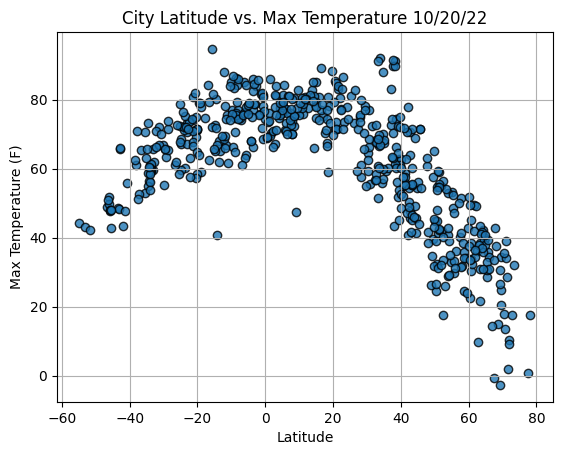

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

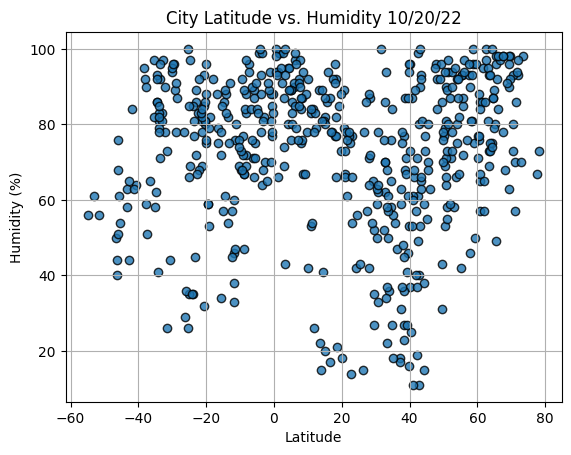

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

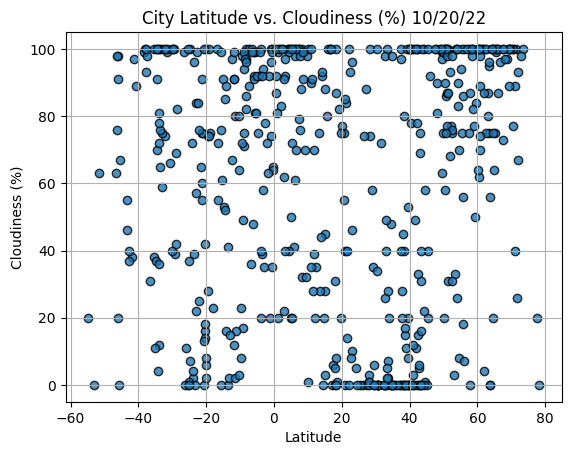

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

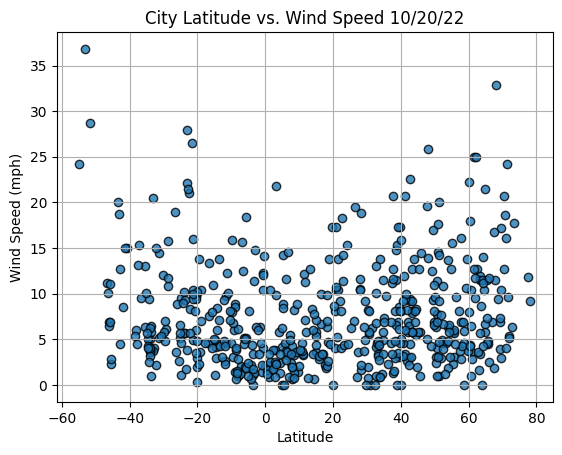

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                 Longyearbyen
Country                        SJ
Date          2022-10-21 00:06:25
Lat                       78.2186
Lng                       15.6401
Max Temp                    17.44
Humidity                       73
Cloudiness                      0
Wind Speed                   9.22
Name: 13, dtype: object

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Barrow,US,2022-10-21 00:06:21,71.2906,-156.7887,28.42,86,100,24.16
2,Hilo,US,2022-10-21 00:06:22,19.7297,-155.0900,88.29,73,20,17.27
3,Severobaykalsk,RU,2022-10-21 00:06:22,55.6500,109.3167,29.86,72,56,3.04
7,Washougal,US,2022-10-21 00:06:06,45.5826,-122.3534,71.40,70,20,1.01
8,Haines Junction,CA,2022-10-21 00:06:24,60.7522,-137.5108,38.41,86,100,3.56


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

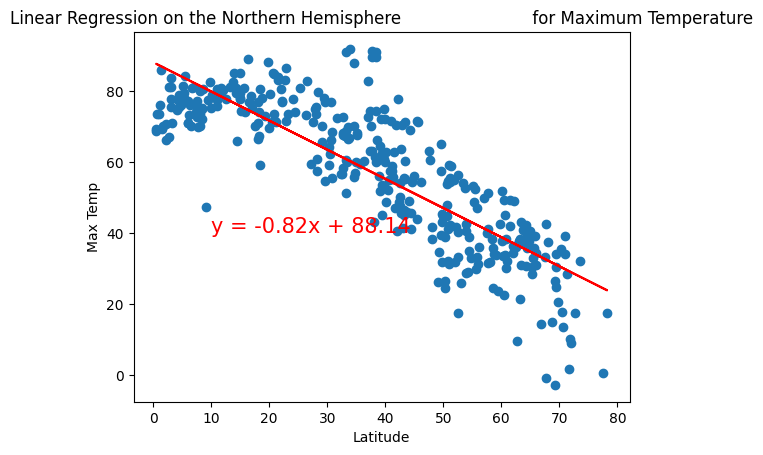

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

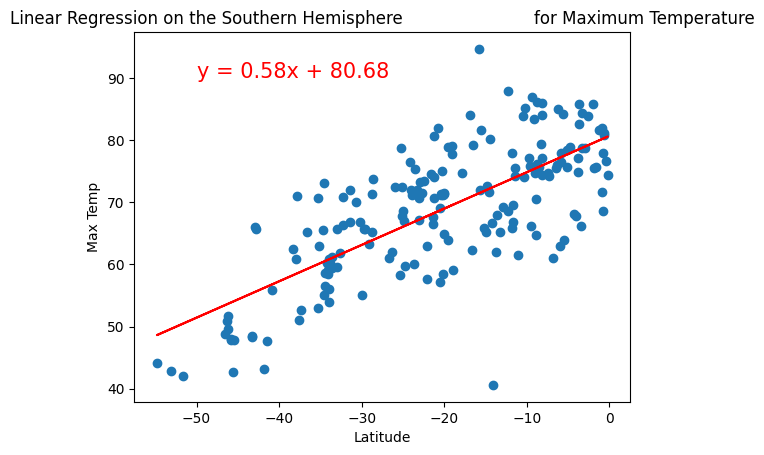

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

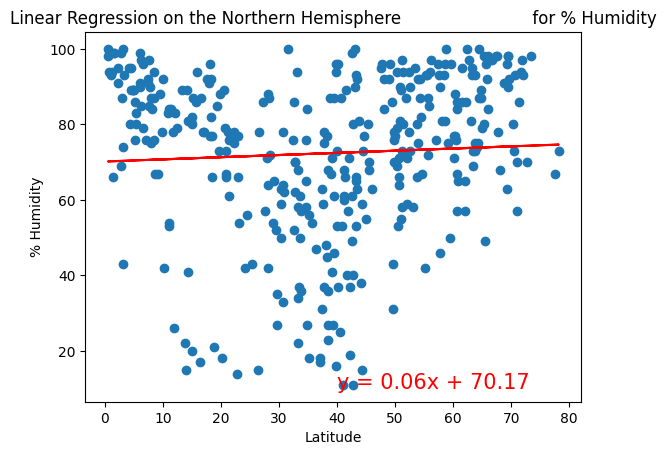

In [32]:
# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

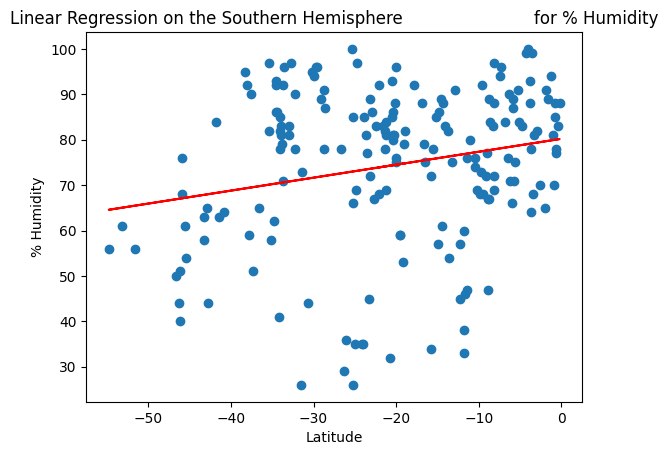

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

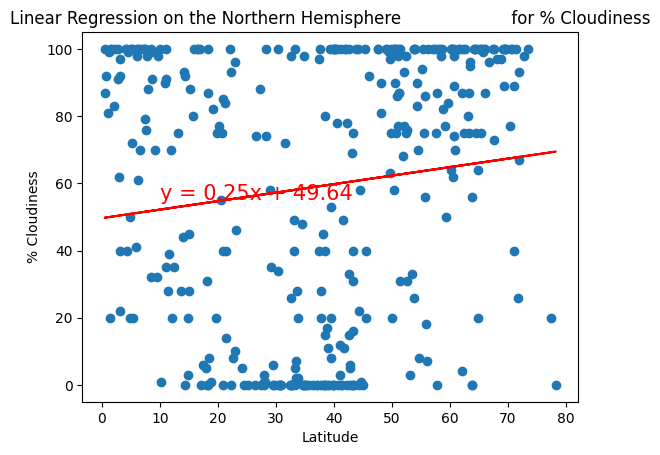

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

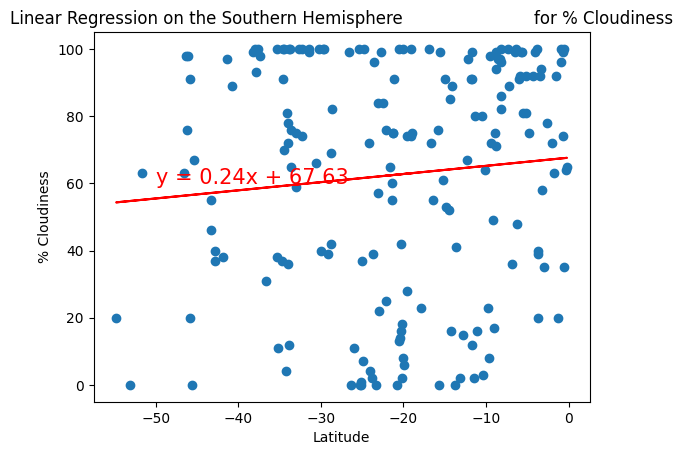

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

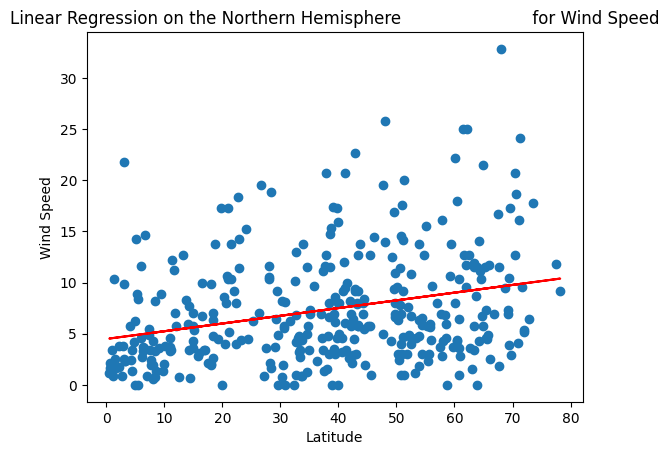

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

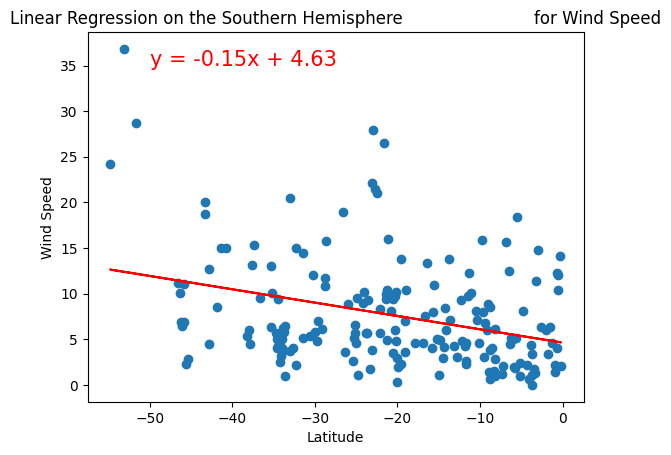

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [1]:
import gmaps

ModuleNotFoundError: No module named 'gmaps'